# link:  https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand



# 1) Can we identify a trend of increasing engagement over time in this time series data?

# 2) Can we group similar posts based on how people engage with them, and can this help us make more engaging content?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)



In [2]:
data=pd.read_csv('Live_20210128.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.keys()

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [4]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [6]:
data.describe(include='all')

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
unique,NaN,4,6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,photo,3/20/2018 1:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4288,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3525.500000,NaN,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,NaN,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,NaN,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,NaN,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,NaN,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


## check for missing values:


In [7]:
data.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

# Column1	Column2	Column3	Column4 are all  missing values thus I'll drop them.

# there is only one dimension categorical (status_type)

In [8]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [9]:
data['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

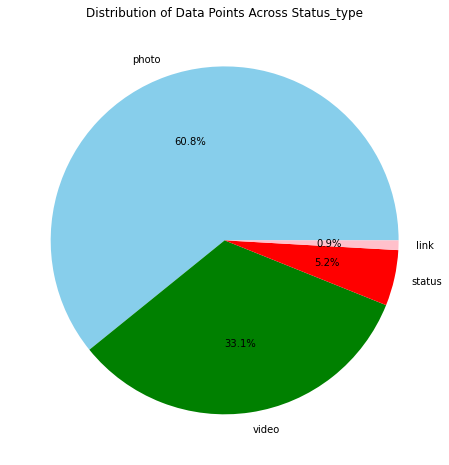

In [10]:
status_type_counts = data['status_type'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(status_type_counts, labels=status_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'green', 'red', 'pink'])


plt.title('Distribution of Data Points Across Status_type')

# Show the pie chart
plt.show()


so maggiority of post are photo

#  status published contain date time data, i need to tranform it in the right format to work with it:

In [11]:



data['status_published'] = pd.to_datetime(data['status_published'])
data['status_published']


0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]

# now group by months so i can do some analysis:

In [12]:
data['year_month'] = data['status_published'].dt.to_period('M') #create a column with time data groupped by M  month

i'll now check the number of 	comments, reactions, shares and 	likes over the entire time period

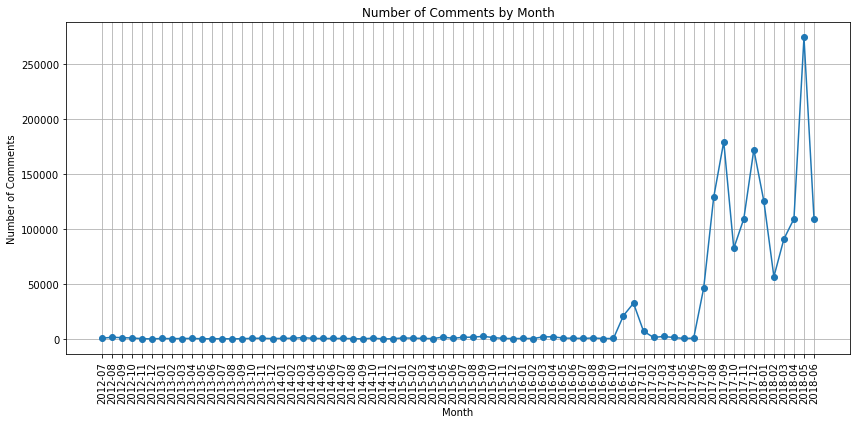

In [13]:


# Group the data by month and sum the number of shares
shares_by_month = data.groupby('year_month')['num_comments'].sum()


x = np.array(shares_by_month.index.strftime('%Y-%m'))
y = np.array(shares_by_month.values)
# Create a time plot
plt.figure(figsize=(12, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.title('Number of Comments by Month')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.grid(True)

# Customize the x-axis labels for better readability
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


## As follow I'll do some analysis to check the number of comments,reactions, shares and likes over 07/2012 and 06/2018

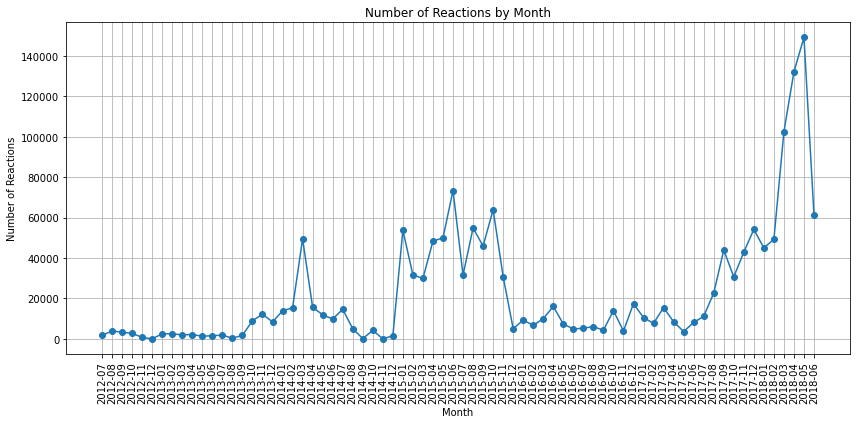

In [14]:
shares_by_month = data.groupby('year_month')['num_reactions'].sum()


x = np.array(shares_by_month.index.strftime('%Y-%m'))
y = np.array(shares_by_month.values)
# Create a time plot
plt.figure(figsize=(12, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.title('Number of Reactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reactions')
plt.grid(True)

# Customize the x-axis labels for better readability
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


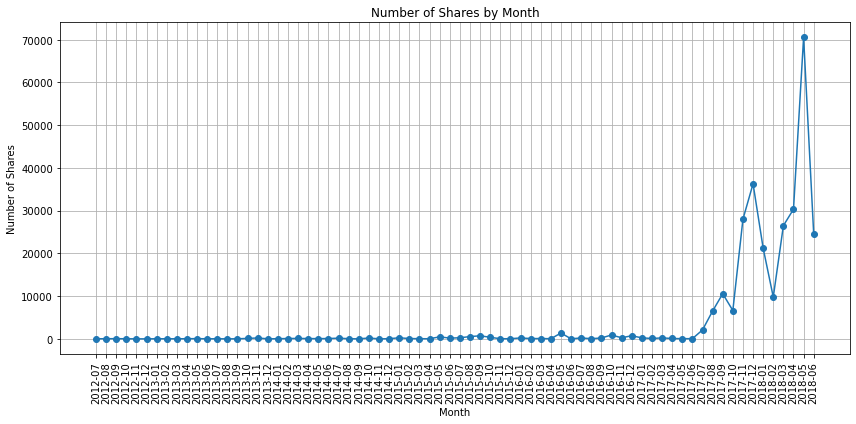

In [15]:
shares_by_month = data.groupby('year_month')['num_shares'].sum()


x = np.array(shares_by_month.index.strftime('%Y-%m'))
y = np.array(shares_by_month.values)
# Create a time plot
plt.figure(figsize=(12, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.title('Number of Shares by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shares')
plt.grid(True)

# Customize the x-axis labels for better readability
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

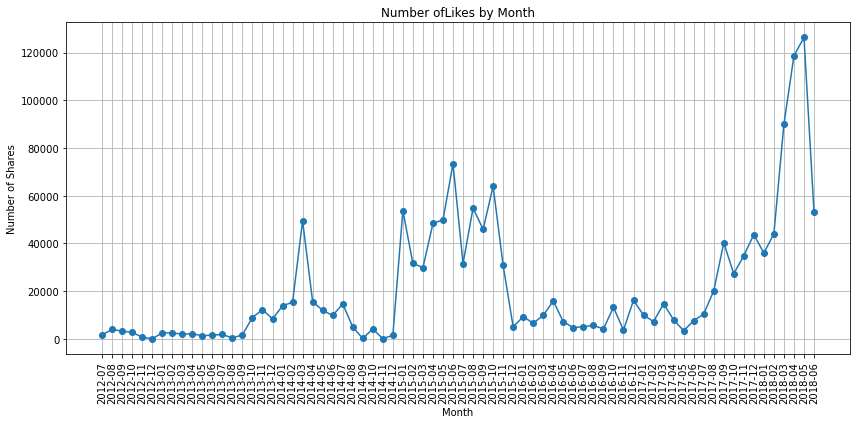

In [16]:
shares_by_month = data.groupby('year_month')['num_likes'].sum()


x = np.array(shares_by_month.index.strftime('%Y-%m'))
y = np.array(shares_by_month.values)
# Create a time plot
plt.figure(figsize=(12, 6))
plt.plot(x,y, marker='o', linestyle='-')
plt.title('Number ofLikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Shares')
plt.grid(True)

# Customize the x-axis labels for better readability
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

# answer 1:
In all of the time plotting we can notice that there is a pick  increse on Engagement starting from july 2017 ,potentially linked to the introduction of Facebook Live videos in April 2016(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7218155/#bib0004) drastically changed the statistical distribution of all engagement metrics, for all types of posts, and had a profound effect on the way followers interact with content. Suggests stronger feelings and bonding between sellers and viewers.





I'll now take off the columns that have no data and those which are not usefull for our clustering.

In [17]:
data.drop(['status_id', 'Column1', 'Column2', 'Column3', 'Column4','status_published','year_month'], axis=1, inplace=True)
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


I try one hot encoder but it gives me not as good result as label encoder

In [18]:
# from sklearn.preprocessing import OneHotEncoder

# hot_enc = OneHotEncoder()

# hot_enc_results = hot_enc.fit_transform(data[['status_type']])

# one_hot_encoded_df = pd.DataFrame(hot_enc_results.toarray(), columns=hot_enc.get_feature_names_out(['status_type']))


# data = pd.concat([data[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']],one_hot_encoded_df], axis=1)


# data

In [19]:
data_encoded=data.copy
data_encoded=pd.DataFrame(data)
data_encoded

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_encoded['status_type'] = le.fit_transform(data_encoded['status_type'].values)
data_encoded['status_type']

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int32

In [21]:
data_encoded

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


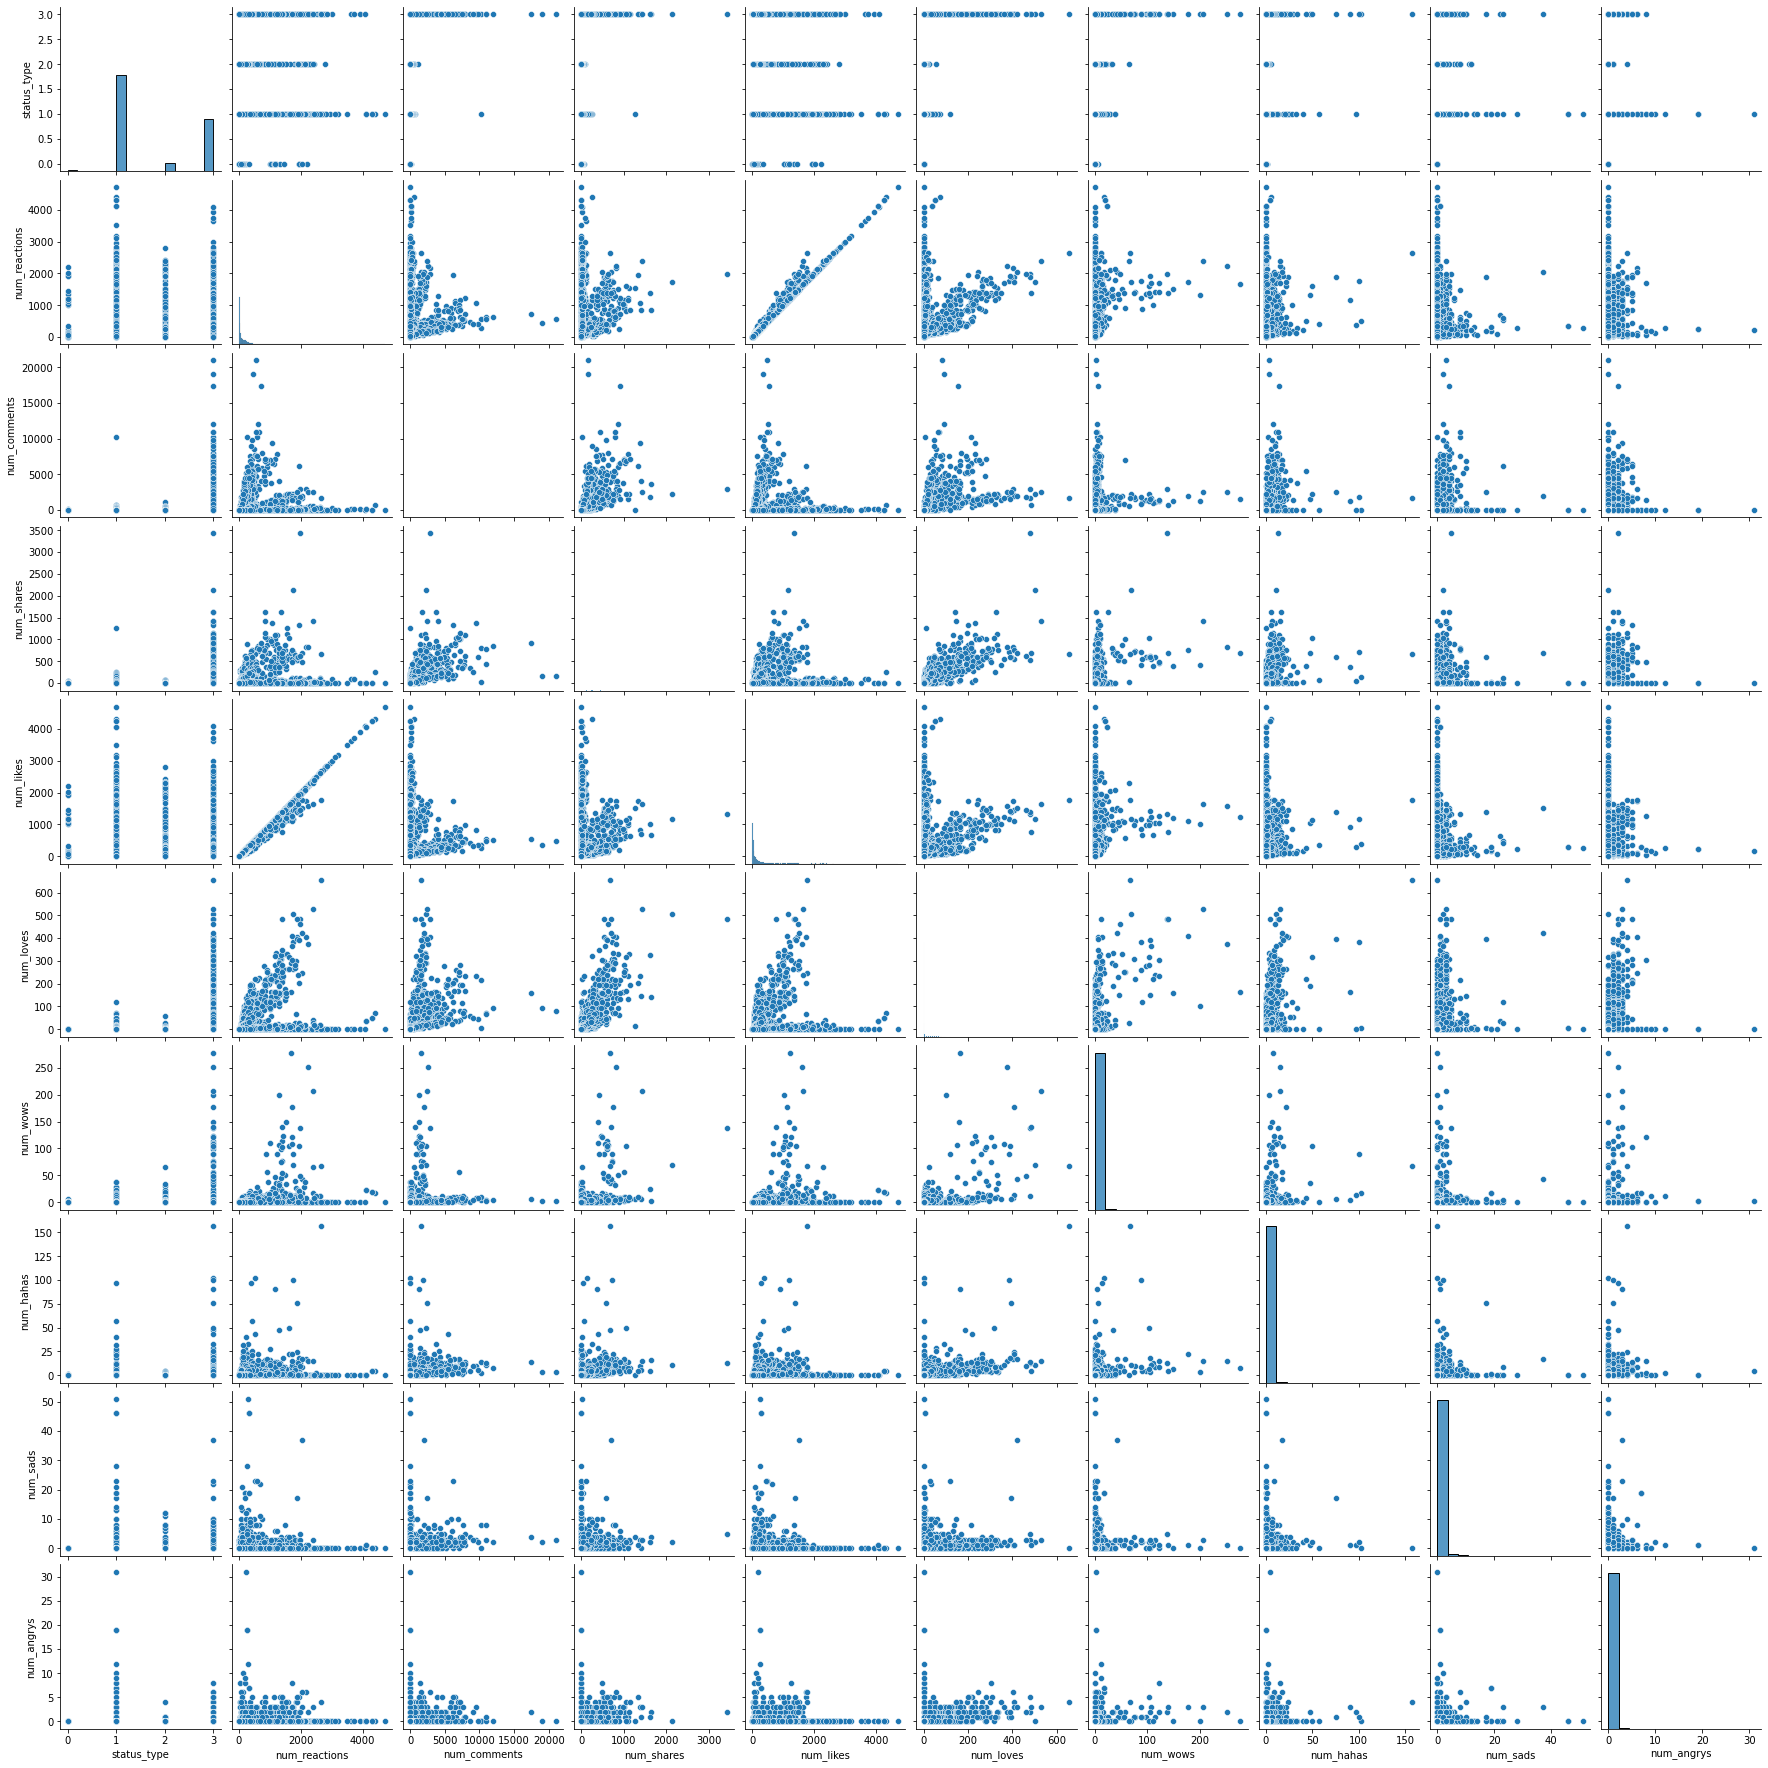

In [22]:
sns.pairplot(data_encoded)


In [23]:
#we also need to scale the data:

from sklearn.preprocessing import StandardScaler
X=data_encoded.iloc[:,:].values
sc_X=StandardScaler()
X_scaled=sc_X.fit_transform(X)
X_scaled

array([[ 1.37428794,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.74810636, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.37428794, -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.74810636, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [24]:
from sklearn.decomposition import PCA


pca=PCA(n_components=2)
X_sc_reduced=pca.fit_transform(X_scaled)


## now we will use the elbow method to find the optimal number of clusters:

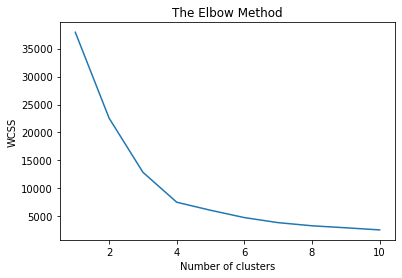

In [25]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): # this is the number of cluster that we want to test (10)
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_sc_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30]
}


kmeans = KMeans()


grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_sc_reduced)


best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best K-Means Model:", best_kmeans)


D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_valid

D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_valid

D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_valid

D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_valid

D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_valid

D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_valid

D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_valid

Best Parameters: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Best K-Means Model: KMeans(n_clusters=2)


D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\anton\anaconda\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


So from above we can see that the optimal number of cluster is 2 but using the elbow method, the results show 4 as optimal number of clusters.

In [27]:
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10,random_state=42)
y_kmeans=kmeans.fit_predict(X_sc_reduced)
y_kmeans

array([1, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import calinski_harabasz_score


print('silhouette score k-means ',silhouette_score(X_sc_reduced,y_kmeans))
print('davies bouldin score k-means', davies_bouldin_score(X_sc_reduced,y_kmeans))#close to 0 is best
print('calinsky score k-means',calinski_harabasz_score(X_sc_reduced,y_kmeans))#high score is good



silhouette score k-means  0.7349469324265064
davies bouldin score k-means 0.5314258511940954
calinsky score k-means 9514.59793388625


In [29]:
data['k-means clusters']=y_kmeans
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,k-means clusters
0,video,529,512,262,432,92,3,1,1,0,1
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0,0
7047,photo,2,0,0,1,1,0,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0,0


# from grid search best number of cluster is 2  but the difference in score is minimal if i use 4 clusters plus  I'll be able to differentiate better the data if i have 4 clusters

Text(0, 0.5, 'dimension 2')

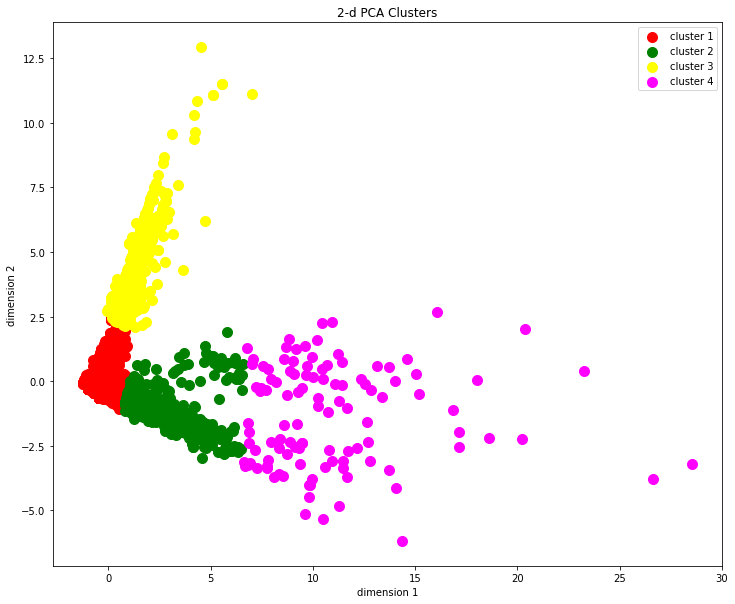

In [30]:
plt.figure(figsize=(12,10))

            
plt.scatter(x=X_sc_reduced[y_kmeans==0,0],y=X_sc_reduced[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x=X_sc_reduced[y_kmeans==1,0],y=X_sc_reduced[y_kmeans==1,1],s=100,c='green',label='cluster 2')
plt.scatter(x=X_sc_reduced[y_kmeans==2,0],y=X_sc_reduced[y_kmeans==2,1],s=100,c='yellow',label='cluster 3')
plt.scatter(x=X_sc_reduced[y_kmeans==3,0],y=X_sc_reduced[y_kmeans==3,1],s=100,c='magenta',label='cluster 4')
#plt.scatter(x=X_sc_reduced[y_kmeans==4,0],y=X_sc_reduced[y_kmeans==4,1],s=100,c='black',label='cluster 5')

plt.legend()
plt.title('2-d PCA Clusters')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')

# hierarchical clustering:

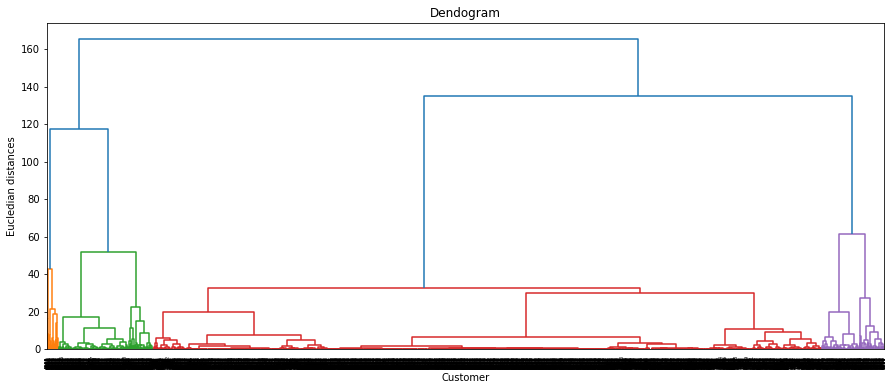

In [31]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendogram=sch.dendrogram(sch.linkage(X_sc_reduced,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer')
plt.ylabel('Eucledian distances')
plt.show()
# you chose the n of cluster based on:
# download the below image, go to paint, draw rectangles between one orizontal line and another,take in consideration only the rectangle that has the higher number of pixel(in lenght) 
# draw an orizontal line which is part of the rectangle. 
#count how many perpendicular line pass true it and that is the number of optimal clusters

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X_sc_reduced)
y_hc

array([1, 2, 2, ..., 2, 2, 2], dtype=int64)

In [33]:
print('siluette score hierarchical ',silhouette_score(X_sc_reduced,y_hc))
print('David bouldin score hierarchical',davies_bouldin_score(X_sc_reduced, y_hc) )
print('calinski_harabasz_score hierarchical',calinski_harabasz_score(X_sc_reduced, y_hc) )
    

siluette score hierarchical  0.732780621979845
David bouldin score hierarchical 0.5886941486211739
calinski_harabasz_score hierarchical 8485.322873083966


# Comparing both results from k-means and hierarchical, k-means has clustered slightly better, thus I'll continue my research using it.

## visualize the distribution of clusters over the data

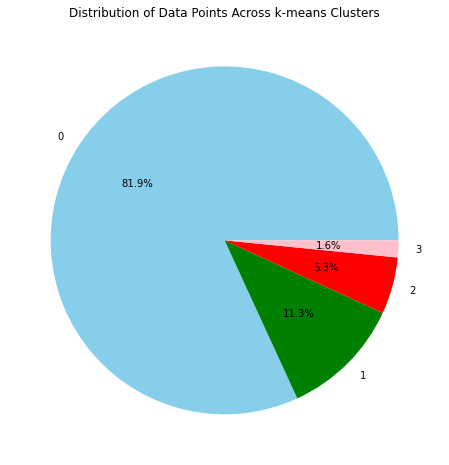

In [34]:

cluster_counts = data['k-means clusters'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=['skyblue', 'green', 'red', 'pink'])


plt.title('Distribution of Data Points Across k-means Clusters')

# Show the pie chart
plt.show()


## We can see that the cluster 0 has 81.9% of all the data points


# I'll now try to find out if  any of the clusters has higher engagement from the public

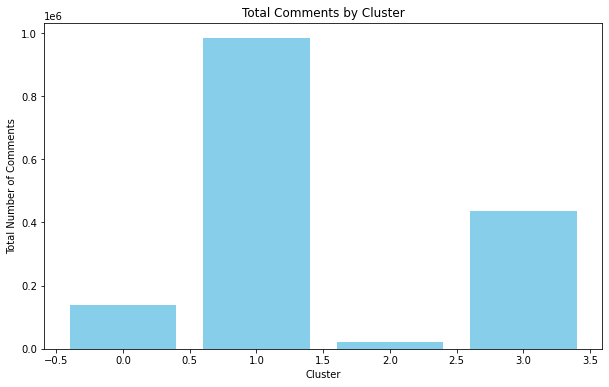

In [36]:
cluster_comments = data.groupby('k-means clusters')['num_comments'].sum()

cluster_labels = cluster_comments.index
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_comments, color='skyblue')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Total Number of Comments')
plt.title('Total Comments by Cluster')

# Show the plot
plt.show()


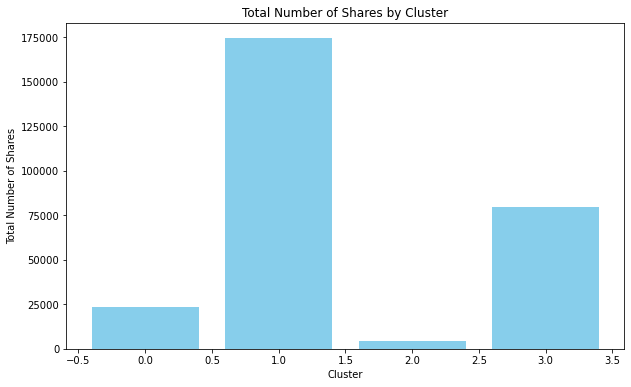

In [37]:

cluster_shares = data.groupby('k-means clusters')['num_shares'].sum()

cluster_labels = cluster_shares.index
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_shares, color='skyblue')

plt.xlabel('Cluster')
plt.ylabel('Total Number of Shares')
plt.title('Total Number of Shares by Cluster')


plt.show()

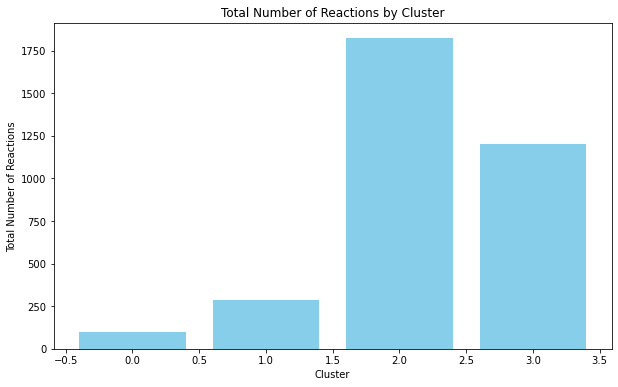

In [38]:

cluster_reactions = data.groupby('k-means clusters')['num_reactions'].mean()

cluster_labels = cluster_reactions.index
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_reactions, color='skyblue')

plt.xlabel('Cluster')
plt.ylabel('Total Number of Reactions')
plt.title('Total Number of Reactions by Cluster')

# Show the plot
plt.show()

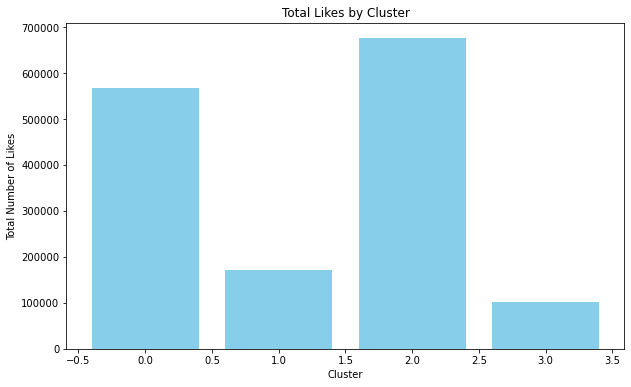

In [49]:

cluster_likes = data.groupby('k-means clusters')['num_likes'].sum()

cluster_labels = cluster_likes.index
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_likes, color='skyblue')

plt.xlabel('Cluster')
plt.ylabel('Total Number of Likes')
plt.title('Total Likes by Cluster')

# Show the plot
plt.show()

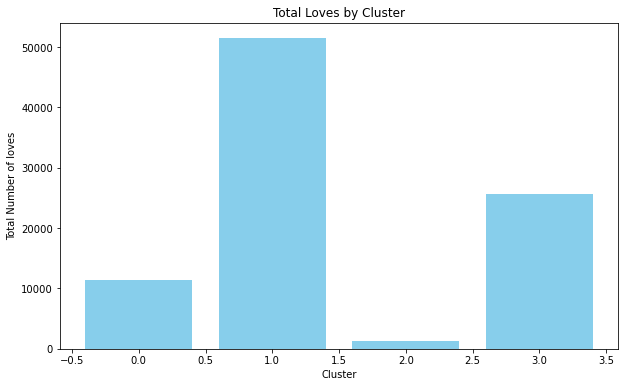

In [48]:

cluster_loves = data.groupby('k-means clusters')['num_loves'].sum()


cluster_labels = cluster_loves.index


plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_loves, color='skyblue')


plt.xlabel('Cluster')
plt.ylabel('Total Number of loves')
plt.title('Total Loves by Cluster')


plt.show()

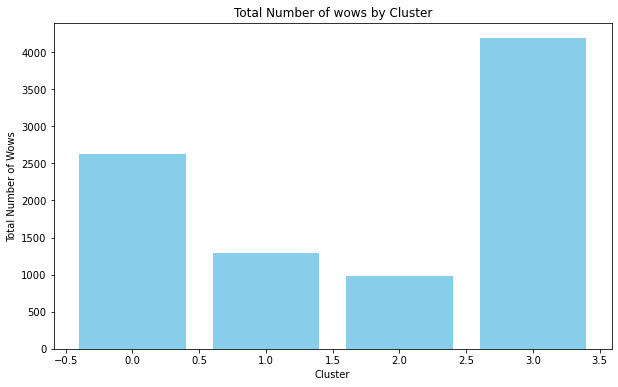

In [50]:

cluster_wows = data.groupby('k-means clusters')['num_wows'].sum()

cluster_labels = cluster_wows.index

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_wows, color='skyblue')

plt.xlabel('Cluster')
plt.ylabel('Total Number of Wows')
plt.title('Total Number of wows by Cluster')

# Show the plot
plt.show()

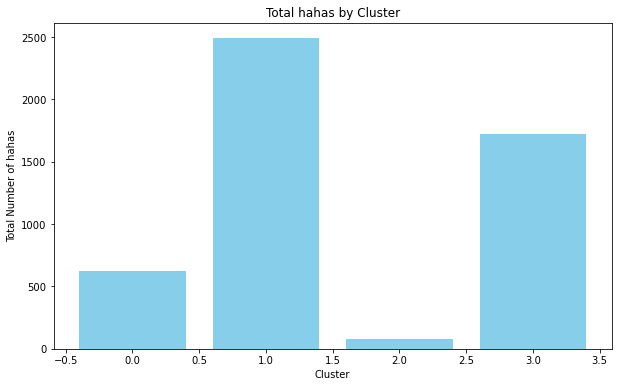

In [47]:

cluster_hahas = data.groupby('k-means clusters')['num_hahas'].sum()


cluster_labels = cluster_hahas.index

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_hahas, color='skyblue')


plt.xlabel('Cluster')
plt.ylabel('Total Number of hahas')
plt.title('Total hahas by Cluster')

# Show the plot
plt.show()

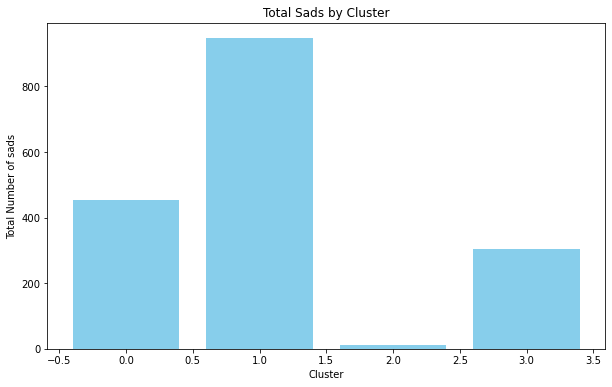

In [46]:

cluster_sad = data.groupby('k-means clusters')['num_sads'].sum()


cluster_labels = cluster_sad.index


plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_sad, color='skyblue')


plt.xlabel('Cluster')
plt.ylabel('Total Number of sads')
plt.title('Total Sads by Cluster')

# Show the plot
plt.show()

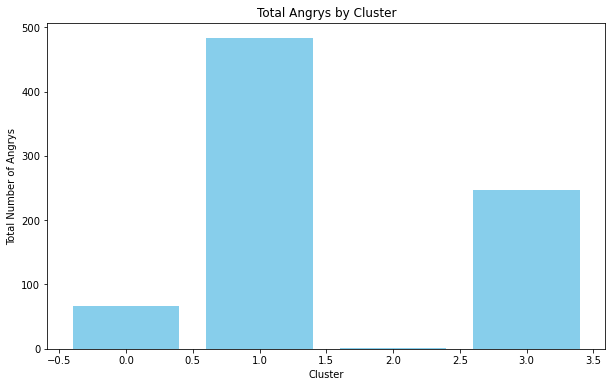

In [51]:

cluster_angry = data.groupby('k-means clusters')['num_angrys'].sum()


cluster_labels = cluster_angry.index


plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_angry, color='skyblue')


plt.xlabel('Cluster')
plt.ylabel('Total Number of Angrys')
plt.title('Total Angrys by Cluster')

# Show the plot
plt.show()

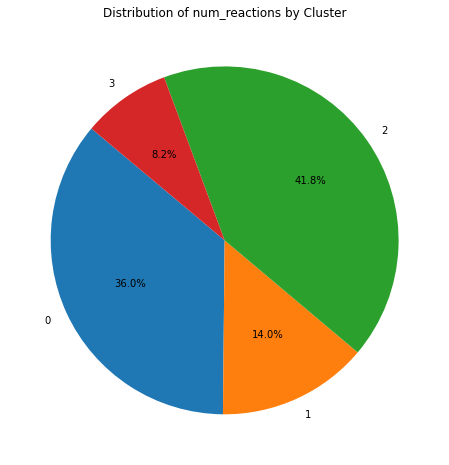

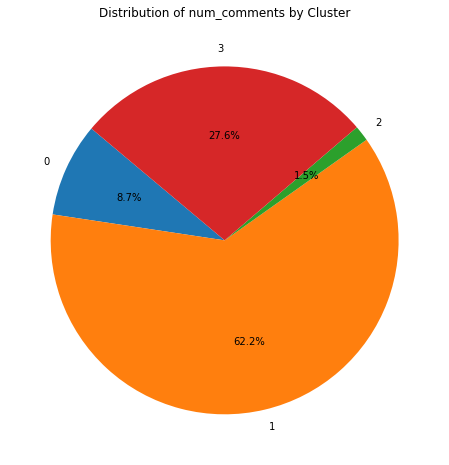

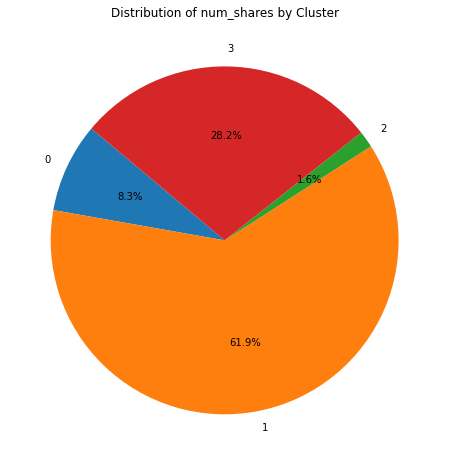

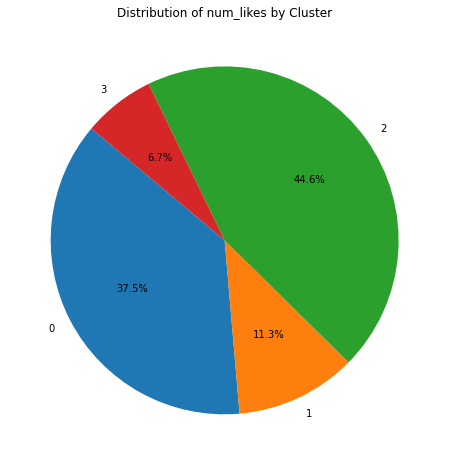

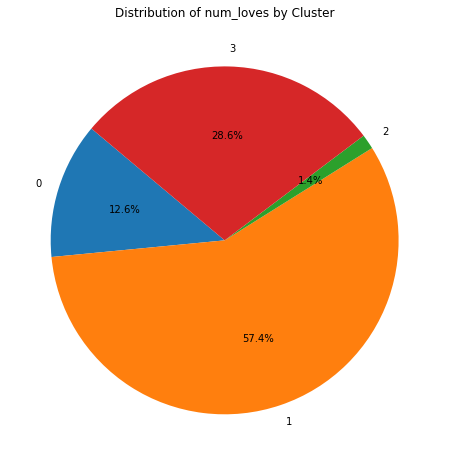

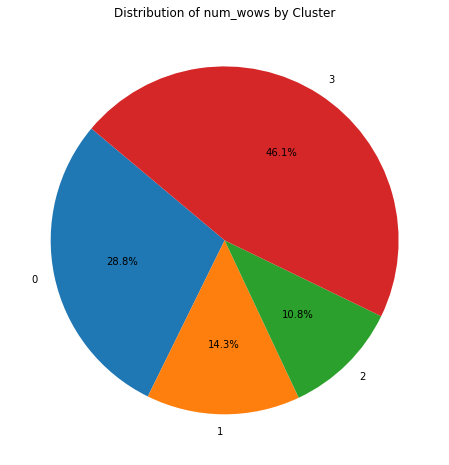

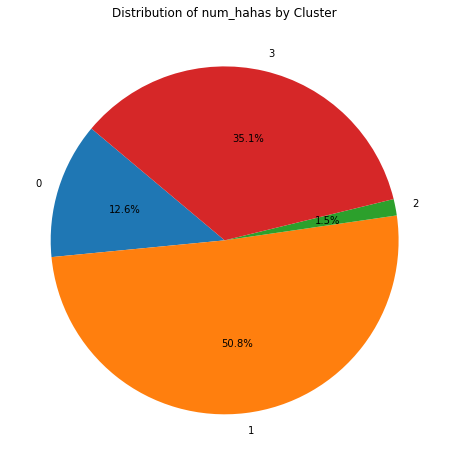

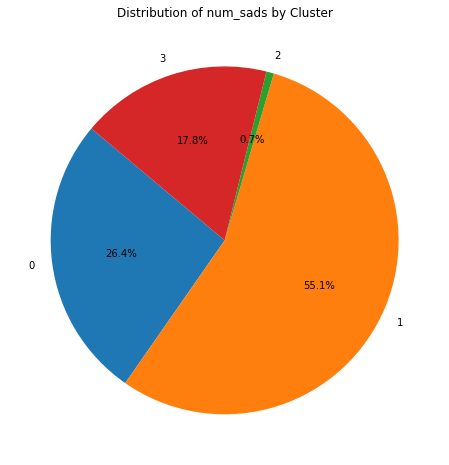

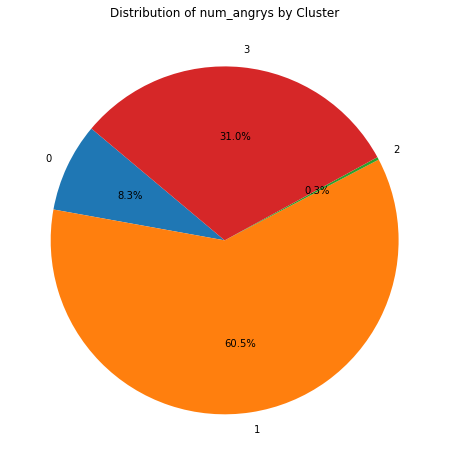

In [45]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame or data structure with cluster labels and numerical attributes
# df['cluster'] contains the cluster labels, and df[attribute] contains the numerical attribute

# List of numerical attributes
numerical_attributes = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Iterate through numerical attributes
for attribute in numerical_attributes:
    # Group the data by cluster and calculate the sum of the attribute for each cluster
    cluster_sums = data.groupby('k-means clusters')[attribute].sum()

    # Create a pie chart for the attribute distribution within clusters
    plt.figure(figsize=(8, 8))
    plt.pie(cluster_sums, labels=cluster_sums.index, autopct='%1.1f%%', startangle=140)

    # Add a title for the specific attribute
    plt.title(f'Distribution of {attribute} by Cluster')

    # Show the pie chart
    plt.show()


cluster 1  (11.3% of total clusters) has the highest number of comments, shares, loves, amuzed, sad and angry
cluster  3 (1.6% of total clusters)  has the higest  number of wows 
cluster  2  (5.3% of total clusters) has the highest number of reactions  and likes
cluster 0 (81.9% of total clusters) none highest values

In [52]:
status_type_cluster_1 = data[data['k-means clusters'] == 1]['status_type']
status_type_cluster_1.value_counts()

status_type
video     759
photo      35
status      2
Name: count, dtype: int64

# answer

# Cluster 1 includes mostly video posts that get a lot of likes, comments, shares, and other reactions. By understanding what makes these posts popular, we can create more content that connects with people emotionally and encourages them to engage with it. This means we can produce and share posts that are more likely to engage our audience, making our overall content more engaging. So, investing in creating more videos is the solution to the business question

